11490434/11490434 [==============================] - 2s 0us/step
Feature shape: 784


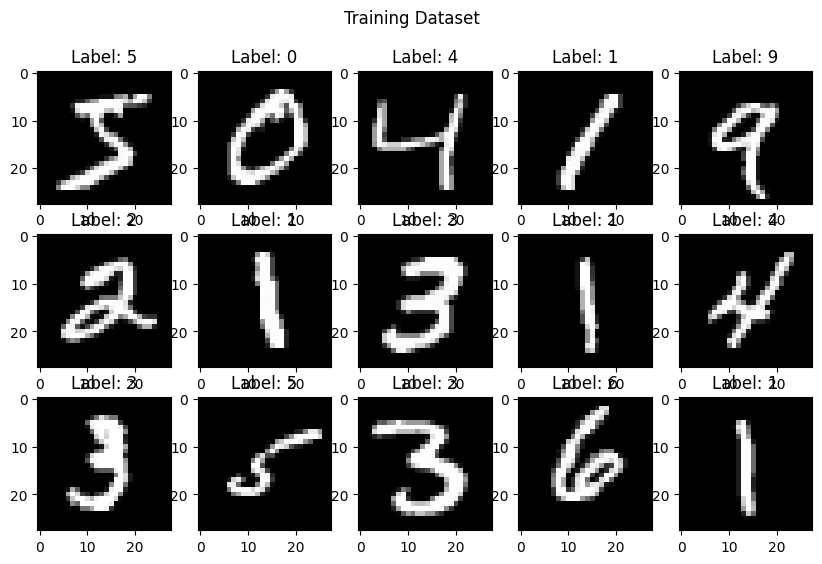

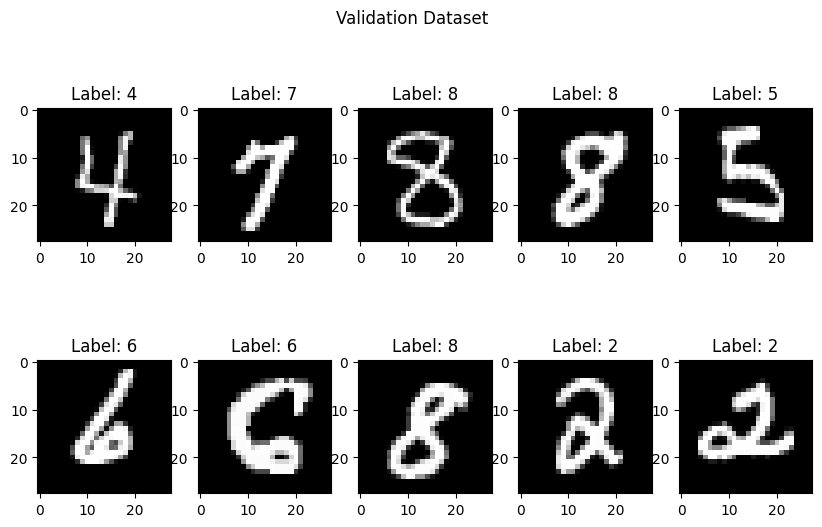

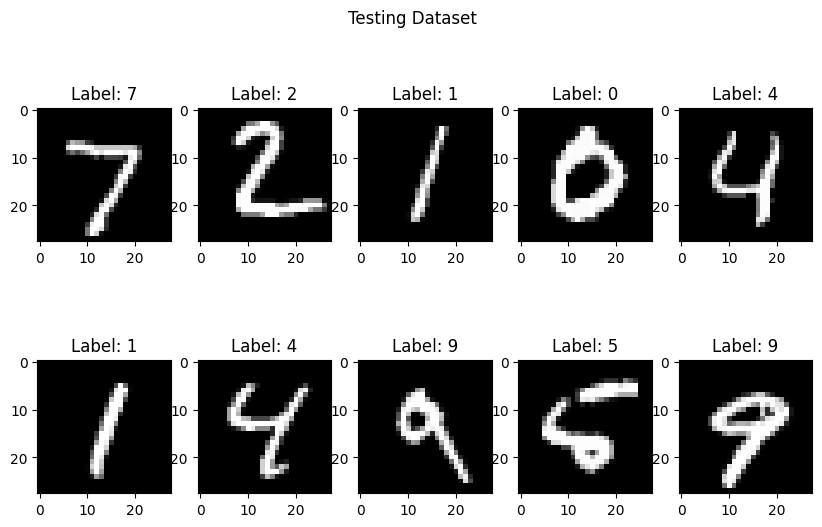

TypeError: 'int' object is not iterable

In [1]:
# Imports
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Configuration options
feature_vector_length = 784
num_classes = 10

# Load the data
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# Reshape the data - MLPs do not understand such things as '2D'.
# Reshape to 28 x 28 pixels = 784 features
X_train = X_train.reshape(X_train.shape[0], feature_vector_length)
X_test = X_test.reshape(X_test.shape[0], feature_vector_length)

# Convert into greyscale
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# Convert target classes to categorical ones
Y_train = to_categorical(Y_train, num_classes)
Y_test = to_categorical(Y_test, num_classes)

# Set the input shape
input_shape = (feature_vector_length)
print(f'Feature shape: {input_shape}')

# Plot sample images from the training dataset
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(10, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i].reshape(28, 28), cmap='gray')
    ax.set_title(f'Label: {Y_train[i].argmax()}')
plt.suptitle('Training Dataset')
plt.show()

# Plot sample images from the validation dataset
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i + int(len(X_train) * 0.8)].reshape(28, 28), cmap='gray')
    ax.set_title(f'Label: {Y_train[i + int(len(X_train) * 0.8)].argmax()}')
plt.suptitle('Validation Dataset')
plt.show()

# Plot sample images from the testing dataset
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(28, 28), cmap='gray')
    ax.set_title(f'Label: {Y_test[i].argmax()}')
plt.suptitle('Testing Dataset')
plt.show()

# Create the model
model = Sequential()
model.add(Dense(350, input_shape=input_shape, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Configure the model and start training
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=10, batch_size=250, verbose=1, validation_split=0.2)

# Test the model after training
test_results = model.evaluate(X_test, Y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')







